In [31]:
%load_ext autoreload
%autoreload 2
#%env CUDA_VISIBLE_DEVICES=3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
from google.colab import files
files.upload()

Saving 3_858_9637591777_09-Aug-19-17-34-40.WAV to 3_858_9637591777_09-Aug-19-17-34-40.WAV


{'3_858_9637591777_09-Aug-19-17-34-40.WAV': b'RIFF\xb3H\x06\x00WAVEfmt \x14\x00\x00\x001\x00\x01\x00@\x1f\x00\x00Y\x06\x00\x00A\x00\x00\x00\x02\x00@\x01fact\x04\x00\x00\x00\xc0\xee\x1e\x00data\x7fH\x06\x00&z\x9f\xde\x82\x02`\x1cWr\x1d\x07+\xa0\xe3\xc8\x91\x14\tk\xa0\xdcHR$K+\x80\x1a)\xb5\xe4\x96\x9e\x96aM1\x02Hn%9\xaei\x03\xb8qLW\x92/\x00F\x92\x13\xa7R\xce\x06Hn\xa5Fn\xa7y\x9b\x9a\xba.\x80\xdbZR\xea\xf6*\x80\xe48N\\\xb9\n@$GR#\t\r`#9q$\x8b\x92\xb6iQ\xea\x00&ndIr9\x04V\x92\x1c\xd5r\xec\x00:N\xe4H\x92\xbb\x046\x95\xe3\xd6igI\xdd\xd9\x84J\x80\\WV+\x97N\xa0$5\x8ec\xd9L@,9q,\xa9+`#\x99rd\x89\x8a\xb3a1\xe5\x06Fn,\xc7Q\xc5\x04F\x96\xabFR\xbb\x06XrSI\xae\xdf\x04\xc6m\xeaH\xae)I\x99\xcd\xe4+`\xdcX\x92\xea\x06\x0e\x80d;\xa9$[l\x80\xdb\xca\x89$u\x0c\x80$I\x92\x1b\x85\x86\xd4\x9dm\xc6\x04Xr\xdcFR\xf4\x04H\xb2\xdcFS\xad\x02(r\xea\xdcM\xb4\x04\xc6u$\xb9\x91\xe88\x1b\x12IO\x80\x9a\xd6\xb5\xdc\x18\x0e`\xddH\x95$\x99,`\x14\xcbm#).\x80\xdb\xd6\xb1\xdbX\x8e3\xa1m\xbe\x06\xc8\x95\x1cIn\xf4\x00(\xb2\xdb\xb

#### Download packages if in Google Colab

In [33]:
colab_requirements = [
    "pip install tensorflow-gpu==2.0.0-beta0",
    "pip install librosa",
    "pip install noisereduce",
    "pip install soundfile",

]

import sys, subprocess

def run_subprocess_command(cmd):
    # run the command
    process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)
    # print the output
    for line in process.stdout:
        print(line.decode().strip())

IN_COLAB = "google.colab" in sys.modules
if IN_COLAB:
    for i in colab_requirements:
        run_subprocess_command(i)

# Test noise reduction algorithm and view steps of algorithm

In [0]:
import IPython
from scipy.io import wavfile
import noisereduce as nr
import soundfile as sf
from noisereduce.generate_noise import band_limited_noise
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import io
%matplotlib inline

### Load data

In [0]:
#url = "http"
#response = urllib.request.urlopen(url)
#data, rate = sf.read(io.BytesIO(url.open()))
#data = data
data, rate = sf.read('3_858_9637591777_09-Aug-19-17-34-40.WAV')
data = data


In [46]:
IPython.display.Audio(data=data, rate=rate)

Output hidden; open in https://colab.research.google.com to view.

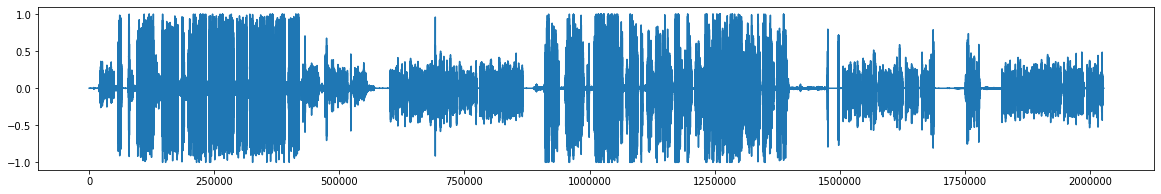

In [47]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(data)

### add noise

In [0]:
noise_len = 1000 # seconds
noise = band_limited_noise(min_freq=2000, max_freq = 12000, samples=len(data), samplerate=rate)*10
noise_clip = noise[:rate*noise_len]
audio_clip_band_limited = data+noise

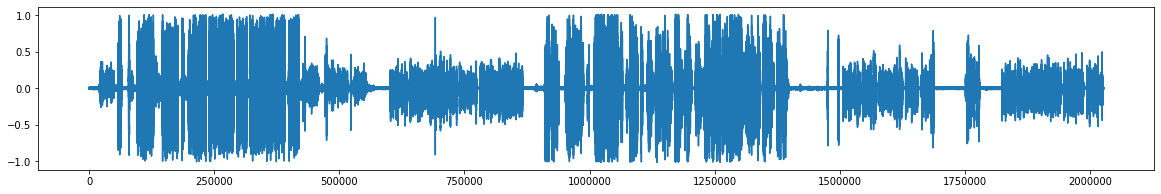

In [49]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(audio_clip_band_limited)

In [50]:
IPython.display.Audio(data=audio_clip_band_limited, rate=rate)

Output hidden; open in https://colab.research.google.com to view.

### remove noise

In [51]:
noise_reduced = nr.reduce_noise(audio_clip=audio_clip_band_limited, noise_clip=noise_clip, verbose=True)

Output hidden; open in https://colab.research.google.com to view.

##### playback recovered audio

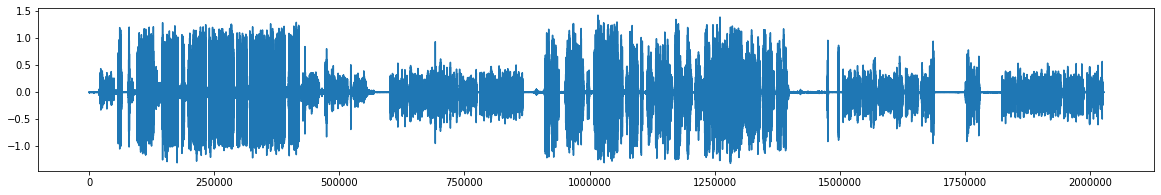

In [52]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(noise_reduced)

In [53]:
IPython.display.Audio(data=noise_reduced, rate=rate)

Output hidden; open in https://colab.research.google.com to view.

## A more difficult example 

In [0]:
#url = "https://raw.githubusercontent.com/timsainb/noisereduce/master/assets/cafe_short.wav"
#response = urllib.request.urlopen(url)
#noise_data, noise_rate = sf.read(io.BytesIO(response.read()))

noise_data, noise_rate = sf.read('3_688_9637591777_13-Aug-19-14-16-20.WAV')


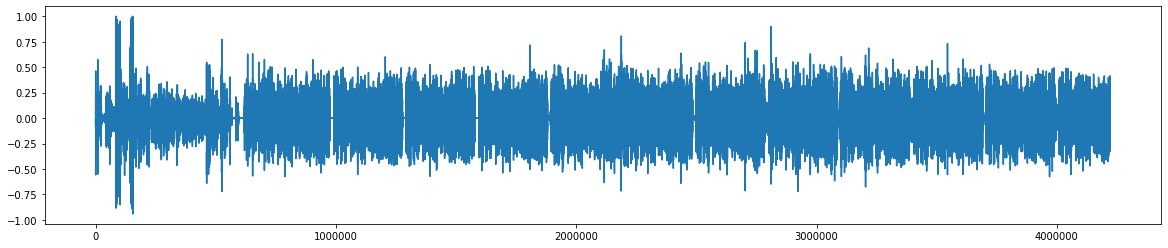

In [17]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(noise_data)

In [18]:
IPython.display.Audio(data=noise_data, rate=noise_rate)

Output hidden; open in https://colab.research.google.com to view.

In [19]:
max(noise_data)

0.999755859375

### add noise to data

In [0]:
snr = 2 # signal to noise ratio
noise_clip = noise_data/snr
audio_clip_cafe = data + noise_clip

### plot noisy data

In [21]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(audio_clip_cafe)

IPython.display.Audio(data=audio_clip_cafe, rate=noise_rate)

Output hidden; open in https://colab.research.google.com to view.

### reduce noise

In [22]:
noise_reduced = nr.reduce_noise(audio_clip=audio_clip_cafe, noise_clip=noise_clip, verbose=True)

Output hidden; open in https://colab.research.google.com to view.

##### playback recovered audio

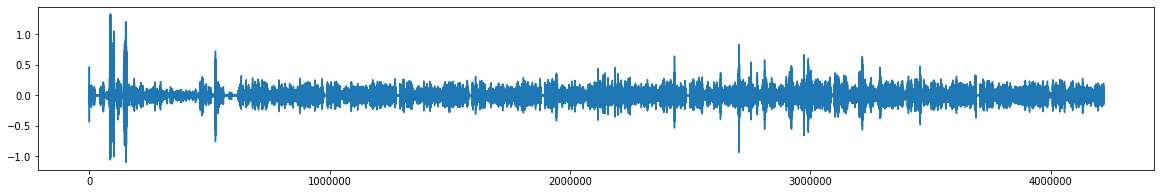

In [23]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(noise_reduced)

In [24]:
IPython.display.Audio(data=noise_reduced, rate=rate)

Output hidden; open in https://colab.research.google.com to view.

## Use tensorflow as the backend for noise reduction

In [25]:
noise_reduced = nr.reduce_noise(audio_clip=audio_clip_cafe.astype('float32'),
                                noise_clip=noise_clip.astype('float32'),
                                use_tensorflow=True, 
                                verbose=False)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [26]:
len(noise_reduced), len(audio_clip_cafe)

(4221440, 4221440)

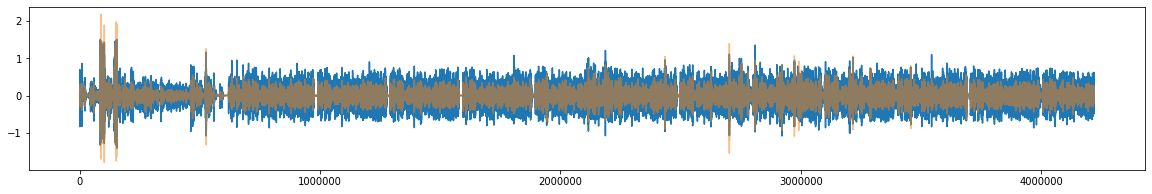

In [27]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(audio_clip_cafe)
ax.plot(noise_reduced, alpha = 0.5)

In [28]:
IPython.display.Audio(data=noise_reduced, rate=rate)

Output hidden; open in https://colab.research.google.com to view.

### Compare times

In [0]:
%%timeit
# non-tensorflow
noise_reduced = nr.reduce_noise(audio_clip=audio_clip_cafe.astype('float32'),
                                noise_clip=noise_clip.astype('float32'),
                                use_tensorflow=False, 
                                verbose=False)

177 ms ± 5.28 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [0]:
%%timeit
# Use tensorflow
noise_reduced = nr.reduce_noise(audio_clip=audio_clip_cafe.astype('float32'),
                                noise_clip=noise_clip.astype('float32'),
                                use_tensorflow=True, 
                                verbose=False)

145 ms ± 3.93 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### compare longer clips

In [0]:
# make a longer clip by repeating the same clip a few times
longer_clip = np.concatenate([audio_clip_cafe.astype('float32') for i in range(100)])
print("Clip is {} seconds long.".format(round(len(longer_clip)/rate)))

Clip is 455 seconds long.


In [0]:
%%time
# non-tensorflow
noise_reduced = nr.reduce_noise(audio_clip=longer_clip,
                                noise_clip=noise_clip.astype('float32'),
                                use_tensorflow=False, 
                                verbose=False)

CPU times: user 1min 16s, sys: 17.5 s, total: 1min 33s
Wall time: 22.7 s


In [0]:
%%time
# use tensorflow
noise_reduced = nr.reduce_noise(audio_clip=longer_clip,
                                noise_clip=noise_clip.astype('float32'),
                                use_tensorflow=True, 
                                verbose=False)

CPU times: user 53.5 s, sys: 10.9 s, total: 1min 4s
Wall time: 14.5 s
